# Classification 

### Binary Classification

Classification is an example of a supervised machine learning technique which means it relies on data that includes known feature values. 

*A classification algorithm is used to fit a subset of the data to a function that can calculate the probability for each class label from the feature values.* The remaining data is used to evaluate the model by comparing the predictions it generates from the features to the known class labels

**the label (the y value) we must train our model to predict. The other columns are potential features (x values).**

Summary: "Classification is a form of supervised machine learning in which you train a model to use the features (the x values in our function) to predict a label (y) that calculates the probability of the observed case belonging to each of a number of possible classes, and predicting an appropriate label."

#### Example 

In [2]:
import os
import pathlib
import pandas as pd
from matplotlib import pyplot as plt
import urllib
from dotenv import load_dotenv


load_dotenv()

CSV_URL="https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv"

csv_path=pathlib.Path(os.environ["DATA_DIR"]) / "diabetes.csv"

urllib.request.urlretrieve(CSV_URL, csv_path)

diabetes=pd.read_csv(csv_path, delimiter=",", header="infer")



diabetes


,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0
...,...,...,...,...,...,...,...,...,...,...
14995,1490300,10,65,60,46,177,33.512468,0.148327,41,1
14996,1744410,2,73,66,27,168,30.132636,0.862252,38,1
14997,1742742,0,93,89,43,57,18.690683,0.427049,24,0
14998,1099353,0,132,98,18,161,19.791645,0.302257,23,0



On the Diabetes label(y)

- 0 for patients who tested negative for diabetes 
- 1 for patients who tested positive.

We separate the features (x) from the label (y)

In [3]:
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
label = 'Diabetic'

X, y = diabetes[features].values, diabetes[label].values

Split the data in 70% 30%

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In addition to the training features and labels, we'll need to set a regularization parameter. This is used to counteract any bias in the sample, and help the model generalize well by avoiding overfitting the model to the training data.

In [5]:
from sklearn.linear_model import LogisticRegression

reg= 0.01

model= LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)

print(model)

LogisticRegression(C=100.0, solver='liblinear')


In [6]:
predictions = model.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ', y_test)

Predicted labels:  [0 0 0 ... 0 1 0]
Actual labels:     [0 0 1 ... 1 1 1]


Let's evaluate the accuracy

- Accuracy: The proportions of the the data the model predict accurately

In [7]:
from sklearn.metrics import accuracy_score

print(f"Accuracy: {accuracy_score(y_test, predictions)}")

Accuracy: 0.7893333333333333


Matrices de confusión

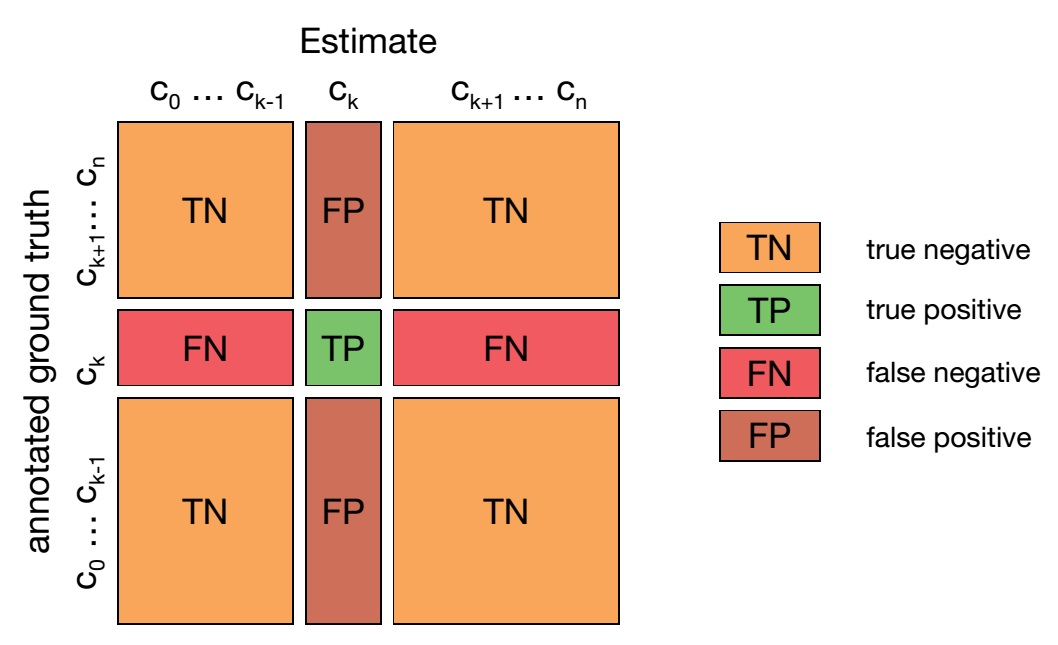

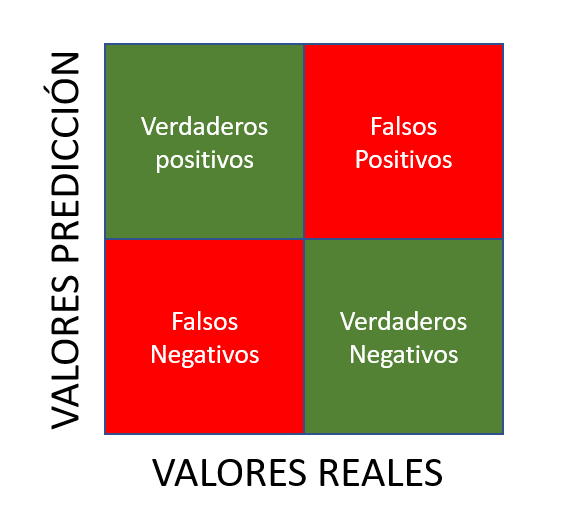

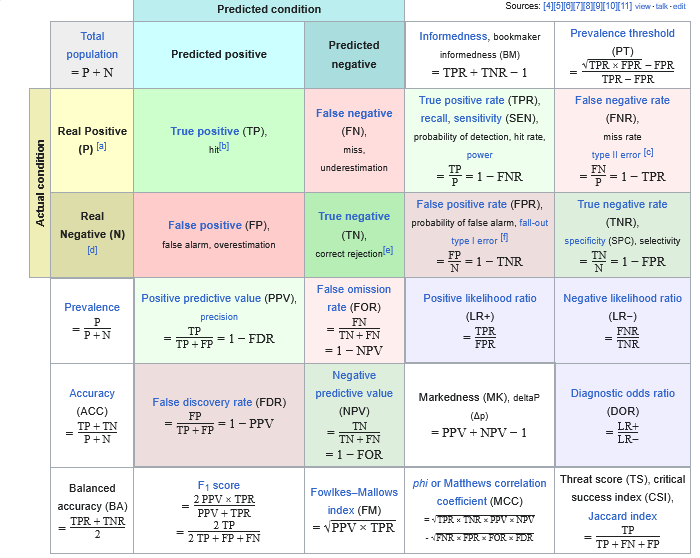

## Using another metrics to determine the performance of a classification model

### Classification report

In [8]:
from sklearn.metrics import classification_report

c_report=classification_report(y_test, predictions)

print(c_report)

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      2986
           1       0.72      0.60      0.66      1514

    accuracy                           0.79      4500
   macro avg       0.77      0.74      0.75      4500
weighted avg       0.78      0.79      0.78      4500



- precision: fraction of relevant instances among the retrieved instances.
- recall: of all of the instances, how many did the model identify

- F1-Score: An average metric that takes both precision and recall into account.
- Support: How many instances of this class are there in the test dataset?

![alt text](6bf4ff05845a63d65d7a43394f708e0882dba7c1.svg)

![alt text](541bb1ab5d962d6dfcbc9298d9c7da2a97133dbe.svg)

In [9]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
print (cm)

[[2638  348]
 [ 600  914]]


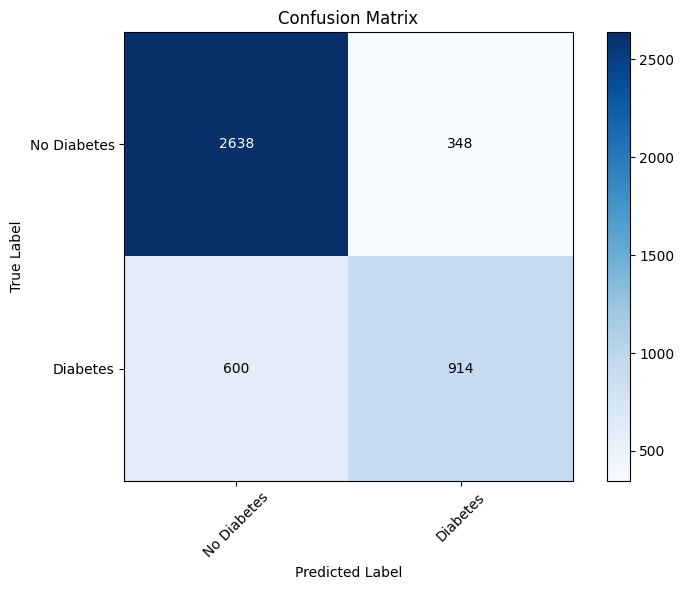

In [10]:
import matplotlib.pyplot as plt

import numpy as np

plt.figure(figsize=(8, 6))

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels
classes = ['No Diabetes', 'Diabetes']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add text annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

What actually gets predicted by a binary classifier is the probability that the label is true (P(y)) and the probability that the label is false (1 - P(y)). A threshold value of 0.5 is used to decide whether the predicted label is a 1 (P(y) > 0.5) or a 0 (P(y) <= 0.5). 

More like the logistic curve between 0 or 1 using the 0.5 margin as a metric for classifing

In [11]:
y_scores = model.predict_proba(X_test)
print(y_scores)

[[0.81651727 0.18348273]
 [0.96298333 0.03701667]
 [0.80862083 0.19137917]
 ...
 [0.60688422 0.39311578]
 [0.10672996 0.89327004]
 [0.63865894 0.36134106]]


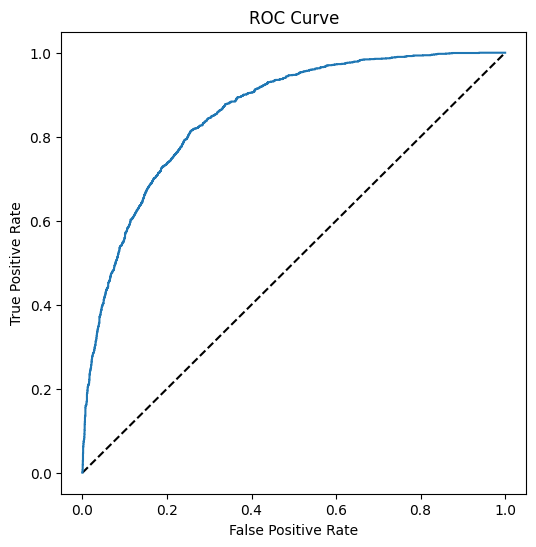

In [12]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

The ROC chart shows the curve of the true and false positive rates for different threshold values between 0 and 1. A perfect classifier would have a curve that goes straight up the left side and straight across the top. The diagonal line across the chart represents the probability of predicting correctly with a 50/50 random prediction - you want the curve to be higher than that (or your model is no better than simply guessing!).

The area under the curve (AUC) is a value between 0 and 1 that quantifies the overall performance of the model. The closer to 1 this value is, the better the model

In [15]:
from sklearn.metrics import roc_auc_score


 # use only the scores for class 1
 # the shape of y_scores is (n_samples, 2)
print(y_scores.shape)

print(roc_auc_score(y_test, y_scores[:,1]))

(4500, 2)
0.8568482508863468


### Preprocessing of the data for better performance

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np

#numeric columns
numeric_features = [0,1,2,3,4,5,6]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

#categorical features (age column)
categorical_features = [7]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', LogisticRegression(C=1/reg, solver="liblinear"))])




Now, we do the model with the pipeline

In [17]:
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor',
                 LogisticRegression(C=100.0, solver='liblinear'))])


Confusion Matrix:
 [[2667  319]
 [ 406 1108]] 

Accuracy: 0.8388888888888889
Overall Precision: 0.7764540995094604
Overall Recall: 0.7318361955085865
AUC: 0.9202444963329531


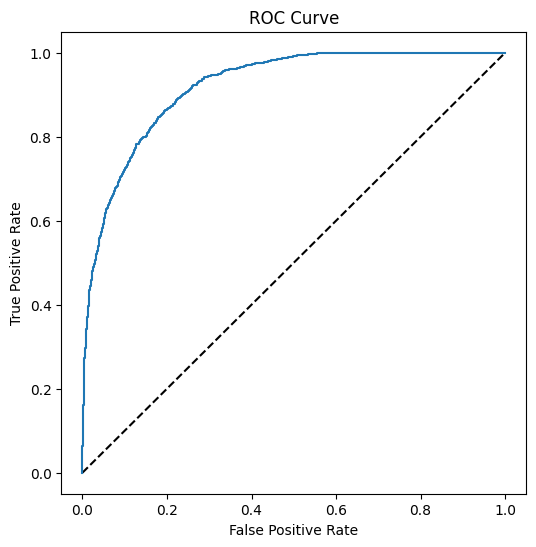

In [18]:
from sklearn.metrics import precision_score, recall_score


predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)

cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:", precision_score(y_test, predictions))
print("Overall Recall:", recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [20]:
#Pre-processing with random forest

from sklearn.ensemble import RandomForestClassifier


pipeline2 = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', RandomForestClassifier(n_estimators=100))])

model_2 = pipeline2.fit(X_train, (y_train))

Confusion Matrix:
 [[2851  135]
 [ 184 1330]] 

Accuracy: 0.9291111111111111
Overall Precision: 0.9078498293515358
Overall Recall: 0.8784676354029062
AUC: 0.9815553826266302


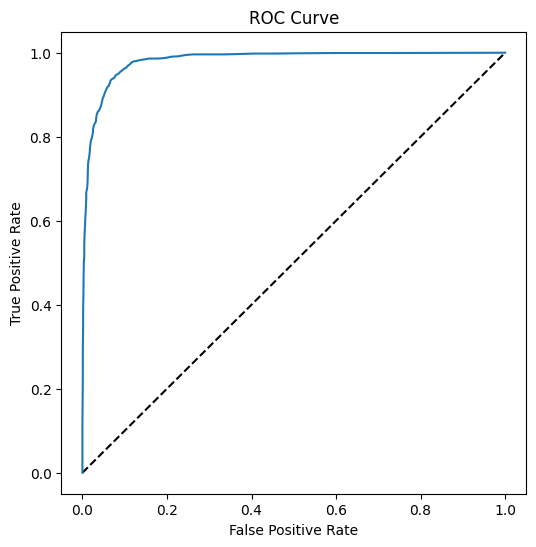

In [21]:
from sklearn.metrics import precision_score, recall_score


predictions = model_2.predict(X_test)
y_scores = model_2.predict_proba(X_test)

cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:", precision_score(y_test, predictions))
print("Overall Recall:", recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

When we process the data, we see that the classifier improved a lot (Evaluating the metrics)